In [7]:
import utils
from collections import defaultdict
# datafile = "/nas/share/ideals2021/data/A1A1A1A1A1.txt"

big_list = []

# DATAPATH = "/home/jvacca4/data/"
DATAPATH = "/nas/share/ideals2021/data/"
os.chdir(DATAPATH)
for datafile in os.listdir("."):
    if "summary" in datafile or "tail" in datafile or datafile[-4:] !=".txt":
        print("Skipping",datafile)
        continue
    # if datafile != "B2.txt":
    #     continue
    print(datafile)
    d = {"name":datafile,"summand":1,"order":0}
    gen_set = set()
    with open(datafile, "rt") as f:
        for line in f:
            line=line.strip()
            if "x" in line:
                d["summand"] += line.count("x")
            if "Order:" in line:
                words = line.split()
                maybe_order = int(words[3])
                if maybe_order>d["order"]:
                    d["order"] = maybe_order
            # elif "Found" in line:
            #     words = line.split()
            #     maybe_total = int(words[1])
            #     if maybe_total>d["total"]:
            #         d["total"] = maybe_total
            elif "gen:" in line:
                for i in utils.get_gen_set(line):
                    gen_set.add(i)
        L = list(gen_set)
        d["gen_set"] = L
    big_list.append(d)

A1B2G2.txt
A1B3.txt
B2G2.txt
Skipping A2B3.txt.gz
G2.txt
A1B2B2.txt
Skipping A1D4ideals.txt.gz
Skipping G2summary.txt
Skipping A1D4ideals-tail.txt
Skipping B3summary.txt
A1B2.txt
A1A2.txt
A1A1G2.txt
A1A2G2.txt
A1A1A1A1A1A1A1.txt
A1A1A1A1A1.txt
Skipping B2summary.txt
A1A3.txt
Skipping A1A2A3.txt.gz
A1A1A1A1A2.txt
A1A1A1A1A1A1.txt
B3.txt
Skipping D2summary.txt
D4.txt
Skipping D3summary.txt
A1A2A2.txt
A2A2.txt
B2.txt
Skipping B2B3ideals.txt.gz
A2A3.txt
A2G2.txt
G2G2.txt
B2B2.txt
A1A1A2A2.txt
Skipping A3summary.txt
A1A1A1B2.txt
A1A1A1A2.txt
A3.txt
Skipping A3G2.txt.gz
A1.txt
Skipping B1summary.txt
A1A1B2.txt
A1A1A1A1B2.txt
A1G2.txt
A1A1A3.txt
A1A1.txt
A1A2B2.txt
A2.txt
Skipping C3summary.txt
A3B2.txt
Skipping A2summary.txt
A1A1A1G2.txt
Skipping C2summary.txt
A1A1A1A1.txt
Skipping lin.png
A4.txt
Skipping A1A4.txt.gz
Skipping C1summary.txt
A1A1A2.txt
A1A1A1.txt
Skipping log.png
A2B2.txt


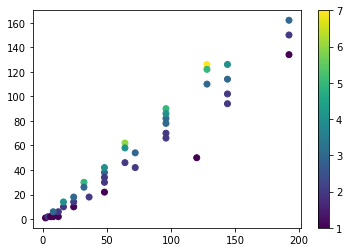

In [9]:
import matplotlib.pyplot as plt
orders = []
gens = []
factors = []
plt.figure()
for grp in big_list:
    orders.append(grp["order"])
    gens.append(len(grp["gen_set"]))
    factors.append(grp["summand"])
    # plt.scatter(grp["order"],len(grp["gen_set"]),label=grp["name"])
    # print(grp["name"],len(grp["gen_set"]),grp["order"])
plt.scatter(orders,gens,c=factors)
plt.colorbar()
plt.show()

In [1]:
# Is the number of generators of a lower-half balanced ideal the maximum # of generators among all balanced ideals?
import utils
from collections import defaultdict
import gzip
# datafile = "/nas/share/ideals2021/data/A1A1A1A1A1.txt"

big_list = []

# DATAPATH = "/home/jvacca4/data/"
DATAPATH = "/nas/share/ideals2021/data/"
os.chdir(DATAPATH)
for datafile in os.listdir("."):
    if "summary" in datafile or "tail" in datafile:
        print("Skipping",datafile)
        continue
    # if datafile != "A1A2.txt":
        # continue
    print(datafile)
    d = {"name":datafile,"summand":1,"order":0,"l(w0)":0,"num_gens":defaultdict(int),"Rh num_gens":defaultdict(int)}
    gen_set = set()


    if datafile[-4:] ==".txt":
        f = open(datafile, "rt")
    else:
        f = gzip.open(datafile, 'rt')
        continue

    for line in f:
        line=line.strip()
        if "x" in line:
            d["summand"] += line.count("x")
        if "Order:" in line:
            words = line.split()
            maybe_order = int(words[3])
            if maybe_order>d["order"]:
                d["order"] = maybe_order
            d["l(w0)"] = int(words[6])
        # elif "Found" in line:
        #     words = line.split()
        #     maybe_total = int(words[1])
        #     if maybe_total>d["total"]:
        #         d["total"] = maybe_total
        elif "gen:" in line:
            # for i in utils.get_gen_set(line):
            #     gen_set.add(i)
            m,n = utils.get_ideal_stats(line)
            d["num_gens"][n] += 1
            if m<=d["l(w0)"]/2:
                d["Rh num_gens"][n] += 1
    L = list(gen_set)
    d["gen_set"] = L
    big_list.append(d)

A1B2G2.txt
A1B3.txt
B2G2.txt
A2B3.txt.gz
G2.txt
A1B2B2.txt
A1D4ideals.txt.gz
Skipping G2summary.txt
Skipping A1D4ideals-tail.txt
Skipping B3summary.txt
A1B2.txt
A1A2.txt
A1A1G2.txt
A1A2G2.txt
A1A1A1A1A1A1A1.txt
A1A1A1A1A1.txt
Skipping B2summary.txt
A1A3.txt
A1A2A3.txt.gz
A1A1A1A1A2.txt
A1A1A1A1A1A1.txt
B3.txt
Skipping D2summary.txt
D4.txt
Skipping D3summary.txt
A1A2A2.txt
A2A2.txt
B2.txt
B2B3ideals.txt.gz
A2A3.txt
A2G2.txt
G2G2.txt
B2B2.txt
A1A1A2A2.txt
Skipping A3summary.txt
A1A1A1B2.txt
A1A1A1A2.txt
A3.txt
A3G2.txt.gz
A1.txt
Skipping B1summary.txt
A1A1B2.txt
A1A1A1A1B2.txt
A1G2.txt
A1A1A3.txt
A1A1.txt
A1A2B2.txt
A2.txt
Skipping C3summary.txt
A3B2.txt
Skipping A2summary.txt
A1A1A1G2.txt
Skipping C2summary.txt
A1A1A1A1.txt
A4.txt
A1A4.txt.gz
Skipping C1summary.txt
A1A1A2.txt
A1A1A1.txt
A2B2.txt


In [4]:
for grp in big_list:
    print(grp["name"])
    # Max # of generators in an ideal, and how many
    k1 = max(grp["num_gens"].keys())
    print("   ",k1, grp["num_gens"][k1])
    # # of 
    if len(grp["Rh num_gens"].keys())>0:
        k2 = max(grp["Rh num_gens"].keys())
        print("   ",k2, grp["num_gens"][k2])
        if k1==k2 and grp["num_gens"][k1] == grp["num_gens"][k2]:
            print("TRUE!")
        else:
            print("-------False.")
    else:
        print("No lower half ideals")

A1B2G2.txt
    31 1
    31 1
TRUE!
A1B3.txt
    15 1
    15 1
TRUE!
B2G2.txt
    15 2
    15 2
TRUE!
G2.txt
    1 2
    1 2
TRUE!
A1B2B2.txt
    26 1
    26 1
TRUE!
A1B2.txt
    4 1
    4 1
TRUE!
A1A2.txt
    3 1
    3 1
TRUE!
A1A1G2.txt
    8 2
    8 2
TRUE!
A1A2G2.txt
    23 5
    23 5
TRUE!
A1A1A1A1A1A1A1.txt
    35 1
    35 1
TRUE!
A1A1A1A1A1.txt
    10 1
    10 1
TRUE!
A1A3.txt
    11 1
    11 1
TRUE!
A1A1A1A1A2.txt
    25 1
    25 1
TRUE!
A1A1A1A1A1A1.txt
    15 6
    15 6
TRUE!
B3.txt
    8 1
    8 1
TRUE!
D4.txt
    24 6
    24 6
TRUE!
A1A2A2.txt
    18 1
    18 1
TRUE!
A2A2.txt
    7 2
    7 2
TRUE!
B2.txt
    1 2
    1 2
TRUE!
A2A3.txt
    30 1
    30 1
TRUE!
A2G2.txt
    12 1
    12 1
TRUE!
G2G2.txt
    19 4
    19 4
TRUE!
B2B2.txt
    11 4
    11 4
TRUE!
A1A1A2A2.txt
    30 2
    30 2
TRUE!
A1A1A1B2.txt
    15 1
    15 1
TRUE!
A1A1A1A2.txt
    11 3
    11 3
TRUE!
A3.txt
    4 2
    4 2
TRUE!
A1.txt
    1 1
No lower half ideals
A1A1B2.txt
    7 2
    7 2
TRUE!
A1A1A1A1B2.txt